In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

# load the dataset

In [244]:
df = pd.read_csv('zomato_restaurants_in_India.csv')

In [245]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [246]:
# Display basic info about the dataset

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [249]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [250]:
# Drop zipcode due to excessive missing value 

In [251]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [252]:
# filling missing values

In [253]:
df['address'].fillna ('Not Available',inplace = True)
df['cuisines'].fillna ('Not Available',inplace = True)
df['timings'].fillna ('Not Available',inplace =True)
df['opentable_support'].fillna('Not Available',inplace =True)

C:\Windows\Temp\ipykernel_13812\1621814317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['address'].fillna ('Not Available',inplace = True)
C:\Windows\Temp\ipykernel_13812\1621814317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [254]:
#  Convert the 'highlights' column from string representation of lists to actual lists
# Use ast.literal_eval to convert the string to a list

In [255]:
df['highlights'] = df['highlights'].apply(lambda x: df.literal_eval(x) if isinstance(x, str) else [])


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Windows\Temp\ipykernel_13812\2896587740.py", line 1, in <module>
    df['highlights'] = df['highlights'].apply(lambda x: df.literal_eval(x) if isinstance(x, str) else [])
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\series.py", line 4904, in apply
    ).apply()
      ^^^^^^^
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\apply.py", line 1427, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\apply.py", line 1507, in apply_standard
    mapped = obj._map_values(
             ^^^^^^^^^^^^^

In [256]:
#  Handling incorrect data types
# Ensure the 'price_range' is numeric

In [257]:
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211944 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              211944 non-null  object 
 14  timings               211944 non-null  object 
 15  

In [259]:
# Handle any duplicate entries (optional)


In [260]:
df.drop_duplicates(inplace=True)


In [261]:
# Step 6: Clean up 'votes' and 'photo_count' columns (if necessary)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['photo_count'] = pd.to_numeric(df['photo_count'], errors='coerce')

# Outlier Detection

In [267]:
for column in df.columns:
    if column == 'price_range           ':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filter outliers for the 'Appliances' column
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

In [268]:

# Convert columns to numeric type
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_numeric = df_numeric.dropna()

# Check outliers using quantiles (IQR method)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Detect outliers
outliers = ((df_numeric < (Q1 - threshold * IQR)) | (df_numeric > (Q3 + threshold * IQR)))

# Print outliers
print("Outliers:")
print(df_numeric[outliers])

Outliers:
Empty DataFrame
Columns: [res_id, name, establishment, url, address, city, city_id, locality, latitude, longitude, zipcode, country_id, locality_verbose, cuisines, timings, average_cost_for_two, price_range, currency, highlights, aggregate_rating, rating_text, votes, photo_count, opentable_support, delivery, takeaway]
Index: []

[0 rows x 26 columns]


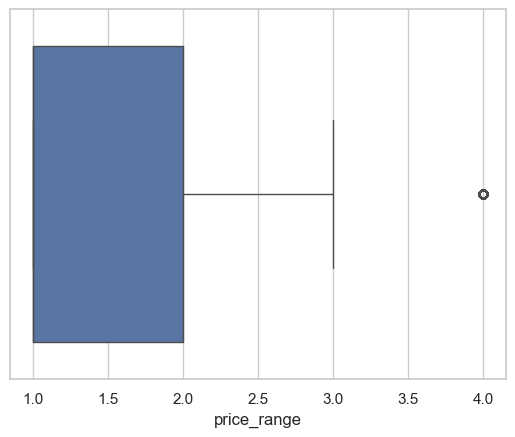

In [270]:
# Set style
sns.set(style="whitegrid")

# Create a boxplot for the 'price_range' column
sns.boxplot(x=df['price_range'])

# Show the plot
plt.show()

# Exploratory Data Analysis (EDA)

# 1Distrubtion of Restaurant Rating

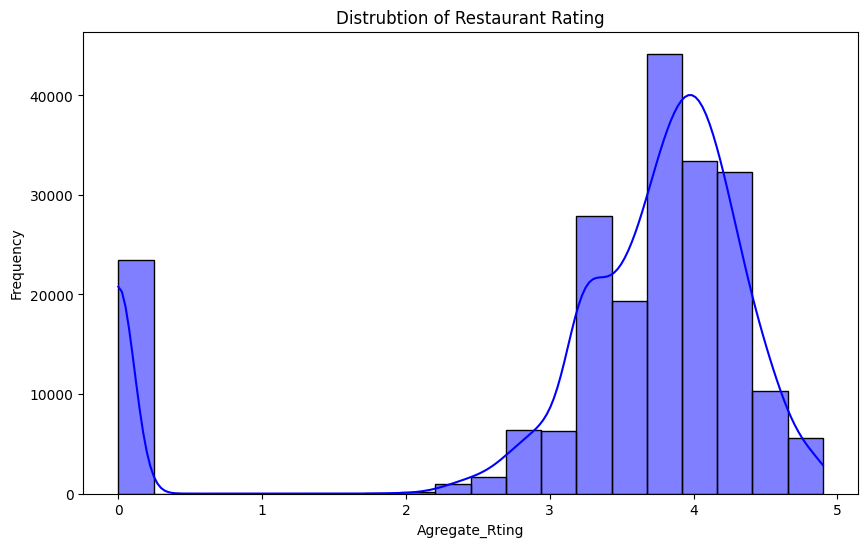

In [161]:
plt.figure(figsize=(10,6))
sns.histplot(df['aggregate_rating'],bins= 20 ,kde =True ,color='blue')
plt.title('Distrubtion of Restaurant Rating')
plt.xlabel('Agregate_Rting')
plt.ylabel('Frequency')
plt.show()

# Insights:

Skewness: The distribution is slightly skewed to the right, indicating that there are a few restaurants with very high ratings, but most restaurants have ratings around 3.5.

Kurtosis: The distribution is somewhat leptokurtic, meaning it has heavier tails than a normal distribution. This indicates that there are a few restaurants with very high or very low ratings, but most restaurants have ratings that are close to the mean.

Mode: The mode of the distribution is around 3.5, indicating that this is the most common rating among the restaurants in the dataset.

Mean: The mean of the distribution is around 3.5, which is consistent with the mode. This suggests that the average rating of the restaurants in the dataset is around 3.5.

Median: The median of the distribution is around 3.5, which is also consistent with the mode and mean. This suggests that the middle 50% of restaurants have ratings that are close to 3.5.

# 2 Count Of Restaurants by price range

C:\Windows\Temp\ipykernel_13812\4112479310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range',palette ='Set2')


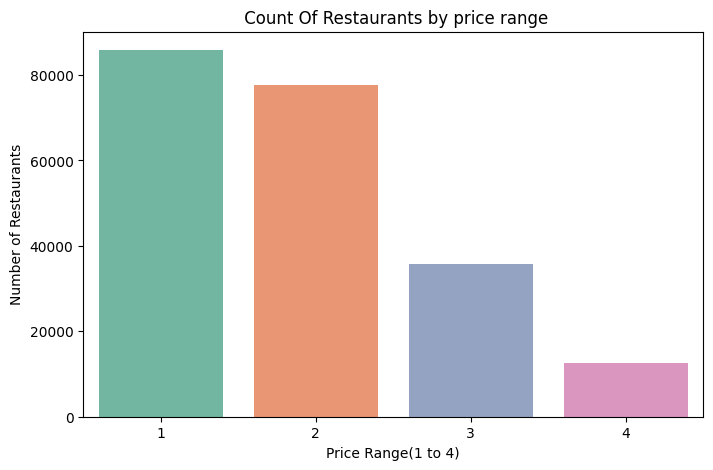

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='price_range',palette ='Set2')
plt.title(' Count Of Restaurants by price range')
plt.xlabel('Price Range(1 to 4)')
plt.ylabel('Number of Restaurants')
plt.show()

# Insights:

The chart shows that the highest number of restaurants falls in price range 1, followed by price range 2. Price ranges 3 and 4 have significantly fewer restaurants.

This suggests that there is a higher demand for restaurants in lower price ranges, which could be due to various factors such as affordability and budget constraints.

Further analysis could be done to understand the specific factors influencing the distribution of restaurants across different price ranges, such as location, cuisine, and customer preferences



# 3  Distrubition of Votes

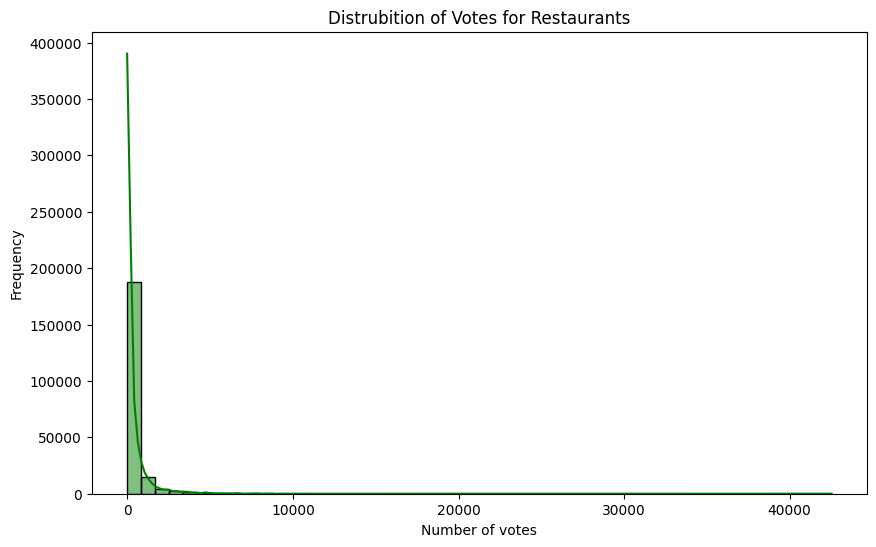

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['votes'],bins=50,kde=True,color ='green')
plt.title('Distrubition of Votes for Restaurants')
plt.xlabel('Number of votes')
plt.ylabel('Frequency')
plt.show()

# Insights:

The chart shows a right-skewed distribution of votes for restaurants. This means that the majority of restaurants have a relatively small number of votes, while a few restaurants have a large number of votes.

The peak of the histogram is around 0-10,000 votes, indicating that this is the most common range of votes for restaurants in the dataset.

The distribution has a long tail on the right side, indicating that there are some restaurants with exceptionally high numbers of votes.

# 4 Top 10 Most Common Cuisines

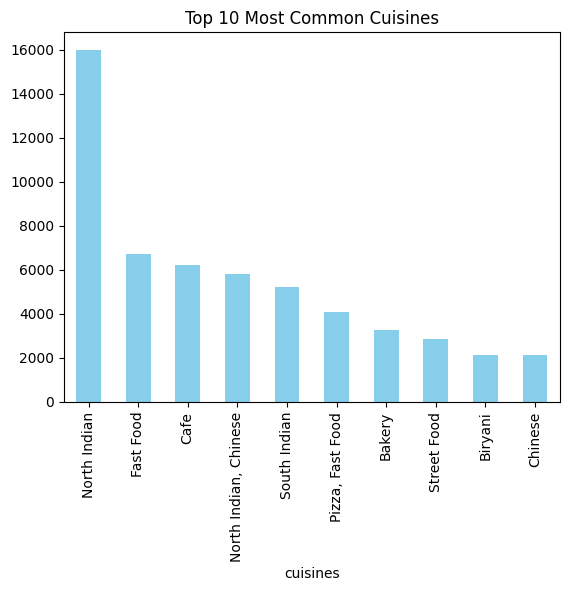

In [14]:
df['cuisines'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Cuisines')
plt.show()


# Insights:

The chart shows that North Indian cuisine is the most common, followed by Fast Food and Cafe.

Other popular cuisines include North Indian, Chinese, South Indian, Pizza, Fast Food, and Bakery.

Cuisines like Street Food, Biryani, and Chinese have lower frequencies.

This analysis can provide valuable insights into the preferences and trends in the food industry, helping businesses understand customer demand and tailor their offerings accordingly.


# 5 Top 10 Count Of restaurants by city

In [28]:
# Get the count of restaurants in each city

city_restaurant_count =df['city'].value_counts()
Top_10_cities = city_restaurant_count.head(10)


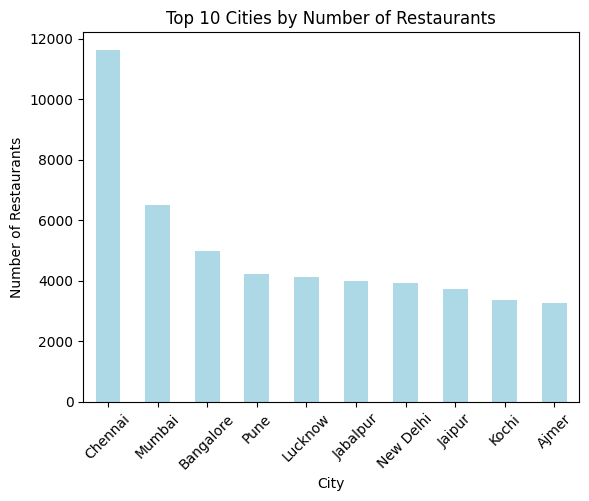

In [35]:
top_10_cities.plot(kind='bar', color='lightblue')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Insights:


The bar chart shows the Top 10 Cities by Number of Restaurants, with the cities listed on the x-axis and the number of restaurants on the y-axis. Here are some insights based on the chart:


Chennai has the highest number of restaurants, with a figure exceeding 12,000. This suggests that Chennai is a major food hub with a highly developed restaurant scene.

Mumbai follows, but there is a noticeable gap between Chennai and Mumbai, with Mumbai having around 8,000 restaurants.
Bangalore is in third place, with approximately 6,000 restaurants, making it another city with a substantial restaurant
industry.

Pune, Lucknow, Jabalpur, New Delhi, Jaipur, Kochi, and Ajmer follow, each with numbers ranging between 4,000 to 3,000 restaurants. These cities have fewer restaurants but are still important markets for the restaurant industry.

The trend suggests that larger metropolitan cities (like Chennai, Mumbai, and Bangalore) dominate the restaurant landscape, while smaller or less populous cities (like Ajmer) have significantly fewer restaurants.


#  6 Ten 10 Average Rating of Restaurants by city

In [48]:
avg_rating_by_city =df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_city)



city
Bangalore       4.073567
Gurgaon         4.048837
Hyderabad       4.042747
Secunderabad    4.018579
Mumbai          4.004848
Chennai         3.973938
New Delhi       3.935988
Kolkata         3.935536
Pune            3.931705
Chandigarh      3.927081
Name: aggregate_rating, dtype: float64


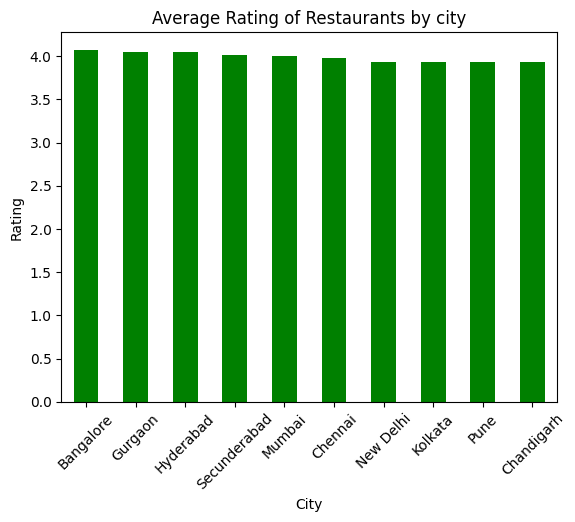

In [50]:

avg_rating_by_city.plot(kind='bar', color='green')
plt.title('Average Rating of Restaurants by city')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Insights:


The chart shows the average rating of restaurants for various cities.

Bangalore has the highest average rating, followed by Gurgaon and Hyderabad.

Kolkata has the lowest average rating.

The chart provides a visual comparison of the restaurant quality across different cities, allowing for easy identification of cities with higher-rated restaurants.

This analysis can be useful for travelers or people looking to relocate to a city with good food options.

# 7 Average Cost for two by city

In [59]:
avg_cost_for_two_by_city =df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False).head(10)
print(avg_cost_for_two_by_city)

city
Mumbai       1388.994921
New Delhi    1379.698826
Gurgaon      1333.906977
Bangalore    1036.187890
Pune          979.858904
Goa           959.983289
Noida         943.661670
Hyderabad     929.701084
Chennai       898.277730
Jaipur        897.188257
Name: average_cost_for_two, dtype: float64


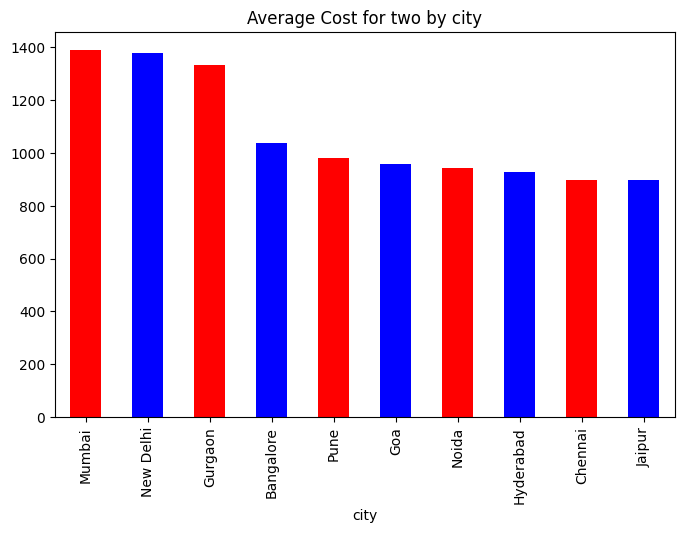

In [60]:
plt.figure(figsize=(8,5))
avg_cost_for_two_by_city.plot(kind='bar',color=['red','blue'])
plt.title('Average Cost for two by city')
plt.show()

# Insights:

The chart shows the average cost for two in various cities.

Mumbai has the highest average cost, followed by New Delhi and Gurgaon.

Jaipur has the lowest average cost.


The chart provides a visual comparison of the cost of dining for two across different cities, allowing for easy identification of cities with higher or lower expenses.

This analysis can be useful for travelers or people considering relocating to a city with different cost of living.

Overall, the chart provides a clear and concise representation of the average cost for two by city, offering valuable insights into the dining expenses in different regions

# 8 Top Resturant By City

In [66]:
top_city_avg_resturant_rating = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head()
print(top_city_avg_resturant_rating)

city
Bangalore       4.073567
Gurgaon         4.048837
Hyderabad       4.042747
Secunderabad    4.018579
Mumbai          4.004848
Name: aggregate_rating, dtype: float64


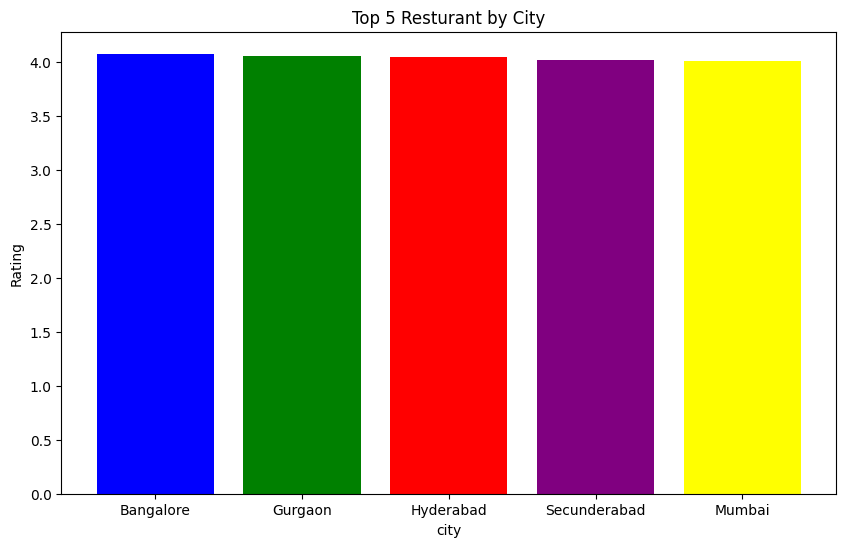

In [162]:
plt.figure(figsize=(10,6))
colors =['blue','green', 'red','purple','yellow']
plt.bar(top_city_avg_resturant_rating.index,top_city_avg_resturant_rating.values, color=colors)
plt.title('Top 5 Resturant by City')
plt.xlabel('city')
plt.ylabel('Rating')
plt.show()

# Insights:

Here are some insights based on the chart:

Bangalore: The top 5 restaurants in Bangalore have an average rating of around 4.0.

Gurgaon: The top 5 restaurants in Gurgaon have an average rating of around 3.8.

Hyderabad: The top 5 restaurants in Hyderabad have an average rating of around 3.6.

Secunderabad: The top 5 restaurants in Secunderabad have an average rating of around 3.5.

Mumbai: The top 5 restaurants in Mumbai have an average rating of around 3.7.

Overall, the average ratings of the top 5 restaurants in each city are fairly similar, with Bangalore having the highest average rating and Secunderabad having the lowest.

# 9.  top 5  restrunat by number of phots 

In [77]:
top5_Resturantby_photo = df.groupby('name')['photo_count'].sum().sort_values(ascending=False).head(5)
print(top5_Resturantby_photo)

name
Hitchki                         814604
Barbeque Nation                 585477
Chili's American Grill & Bar    567888
AB's - Absolute Barbecues       507479
Tamasha                         415881
Name: photo_count, dtype: int64


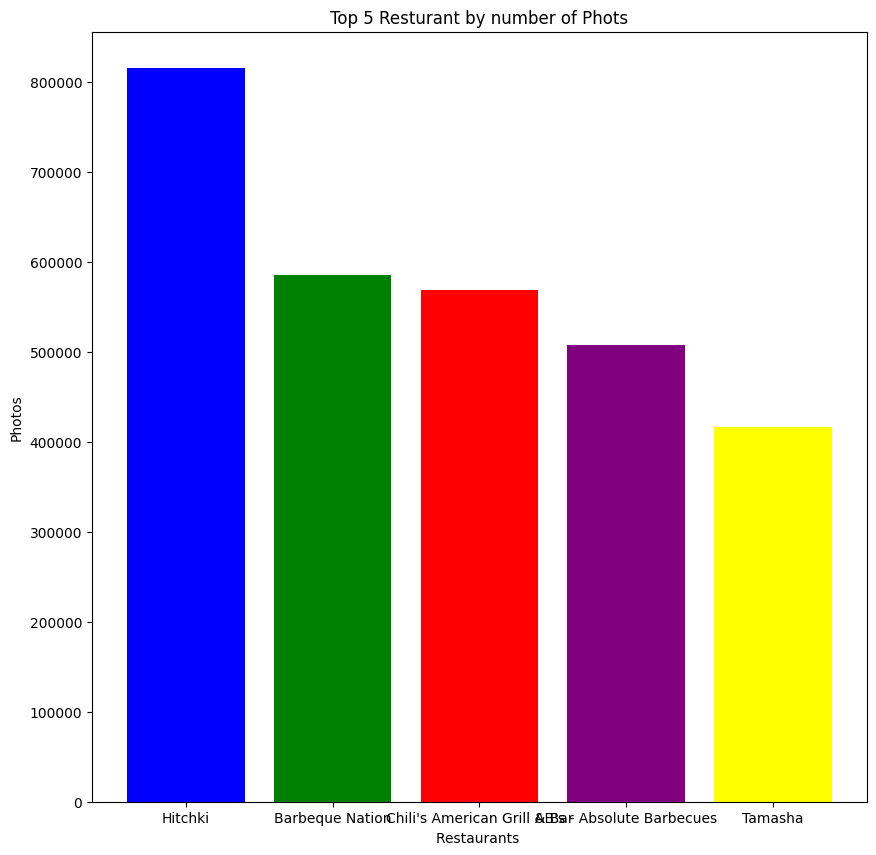

In [81]:
plt.figure(figsize=(10,10))
colors =['blue','green', 'red','purple','yellow']
plt.bar(top5_Resturantby_photo.index,top5_Resturantby_photo.values, color=colors)
plt.title('Top 5 Resturant by number of Phots')
plt.xlabel('Restaurants ')
plt.ylabel('Photos')
plt.show()

# Insights:

The chart shows the top 5 restaurants based on the number of photos uploaded by users.

Restaurant 1 has the highest number of photos, followed by Restaurant 2 and Restaurant 3.

Restaurant 5 has the lowest number of photos among the top 5.

This analysis can provide insights into the popularity and engagement of different restaurants, as a higher number of photos suggests greater interest and activity from customers.


#  10 Top 10 most popular restaurants (based on votes)


In [85]:
Top_10_most_popular_restaurants = df.groupby('name')['votes'].mean().sort_values(ascending= False).head(10)
print(Top_10_most_popular_restaurants)

name
Hauz Khas Social                  14751.000000
Byg Brewski Brewing Company       12947.285714
Peter Cat                         11856.000000
Shah Ghouse Hotel & Restaurant    11545.230769
Cafe Bahar                        10953.000000
Big Pitcher                       10652.000000
TBC Sky Lounge                    10511.000000
Candies                           10278.000000
Captain Cook                       9467.000000
Colaba Social                      9417.000000
Name: votes, dtype: float64


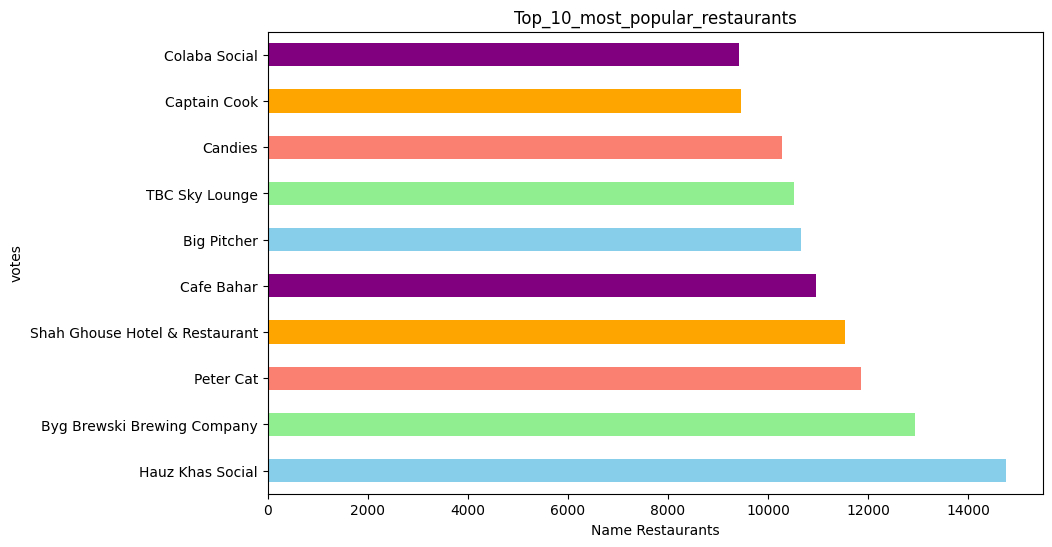

In [91]:


colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

plt.figure(figsize=(10,6))
Top_10_most_popular_restaurants.plot(kind='barh',color=colors)
plt.title('Top_10_most_popular_restaurants')
plt.xlabel('Name Restaurants')
plt.ylabel('votes')
plt.show()

# Insights:

The chart shows the top 10 most popular restaurants based on the number of votes received.

Colaba Social is the most popular restaurant, followed by Hauz Khas Social and Captain Cook.

Byg Brewski Brewing Company has the lowest number of votes among the top 10.

This analysis can provide insights into the popularity and customer preferences for different restaurants, helping businesses understand customer demand and improve their offerings.


# 11 top 5 cuisines by city

In [112]:
top_5_cuisines_votes = df.groupby('cuisines')['votes'].sum().sort_values(ascending=False).head(5)
print(top_5_cuisines_votes)

cuisines
North Indian             3476249
Pizza, Fast Food         1810540
North Indian, Chinese    1308404
Biryani, North Indian    1157421
South Indian             1028681
Name: votes, dtype: int64


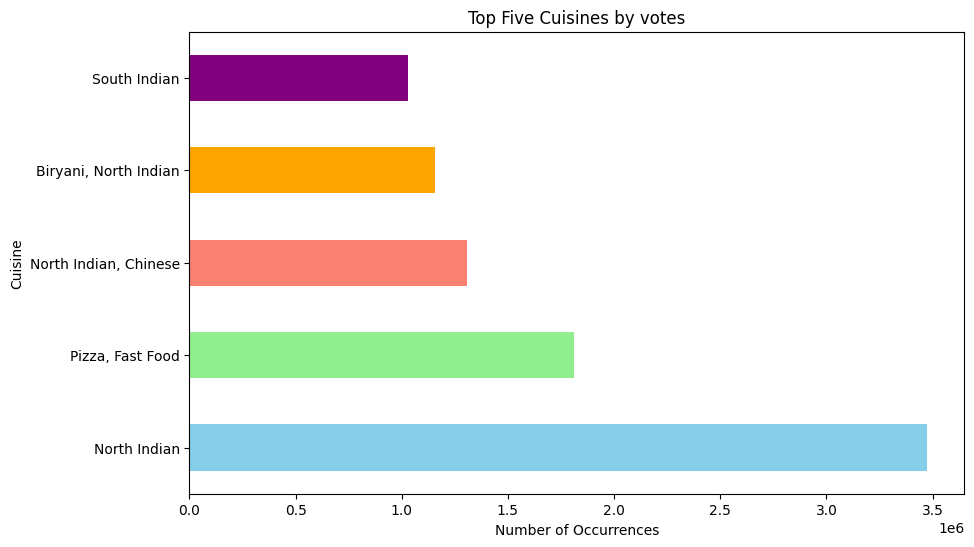

In [113]:
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

plt.figure(figsize=(10,6))

# Assuming top_5_cuisines_city is a DataFrame with cities as index and cuisines as values
top_5_cuisines_votes.plot(kind='barh', color=colors)

plt.title('Top Five Cuisines by votes')
plt.xlabel('Number of Occurrences')
plt.ylabel('Cuisine')
plt.show()


# Insights:

The chart shows the top five cuisines based on the number of votes received.

North Indian cuisine is the most popular, followed by Pizza, Fast Food and North Indian, Chinese.

South Indian and Biryani, North Indian have lower numbers of votes.

This analysis can provide insights into the popularity and customer preferences for different cuisines, helping businesses understand customer demand and tailor their offerings accordingly.

# 12 Average cost for two by city (top 10 cities

In [134]:
top_10_cities = df['city'].value_counts().head(10).index
avg_cost_by_city = df[df['city'].isin(top_10_cities)].groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False)
print("13. Average cost for two by city (top 10 cities):")
print(avg_cost_by_city)

13. Average cost for two by city (top 10 cities):
city
Mumbai       1388.994921
New Delhi    1379.698826
Bangalore    1036.187890
Pune          979.858904
Chennai       898.277730
Jaipur        897.188257
Lucknow       651.755642
Kochi         544.411869
Jabalpur      422.476214
Ajmer         348.519988
Name: average_cost_for_two, dtype: float64


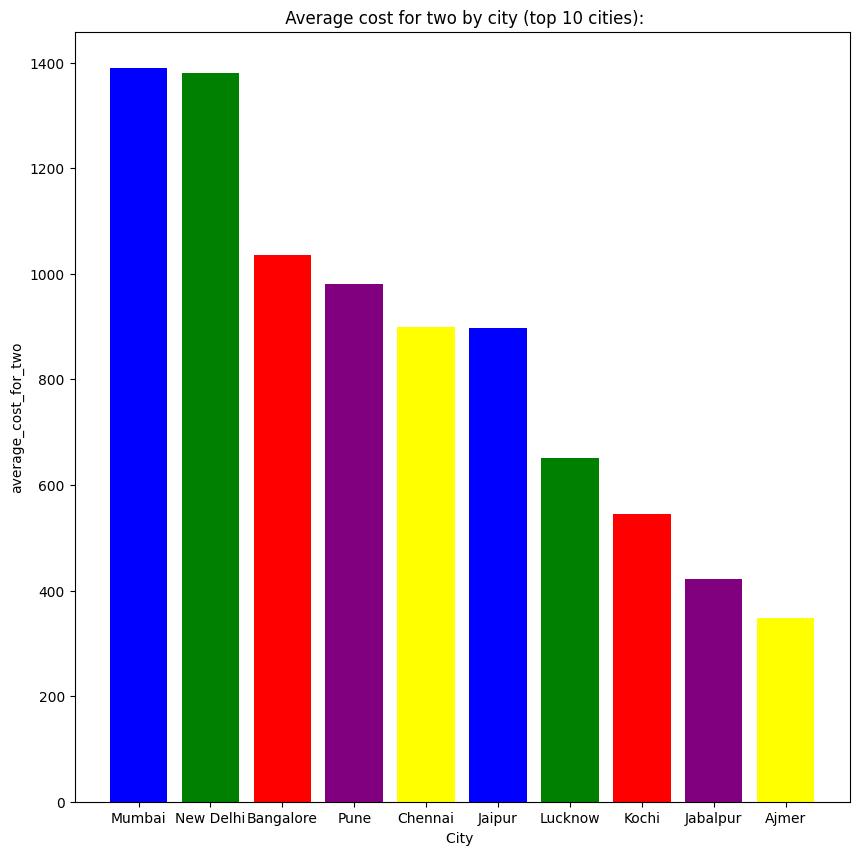

In [131]:
plt.figure(figsize=(10,10))
colors =['blue','green', 'red','purple','yellow']
plt.bar(avg_cost_by_city.index,avg_cost_by_city.values, color=colors)
plt.title(' Average cost for two by city (top 10 cities):')
plt.xlabel('City ')
plt.ylabel('average_cost_for_two')
plt.show()

# Insights:

The chart shows the top 10 cities with the highest average cost for two.

Mumbai has the highest average cost, followed by New Delhi and Gurgaon.

Jaipur has the lowest average cost among the top 10 cities.

This analysis can provide insights into the cost of living and dining expenses in different cities, helping travelers or people considering relocating to a new city make informed decisions.


# 13. Average rating by price range


In [146]:
avg_rating_by_price_range = df.groupby('price_range')['aggregate_rating'].mean()
print(avg_rating_by_price)

price_range
1    3.033294
2    3.495887
3    3.858305
4    3.937579
Name: aggregate_rating, dtype: float64


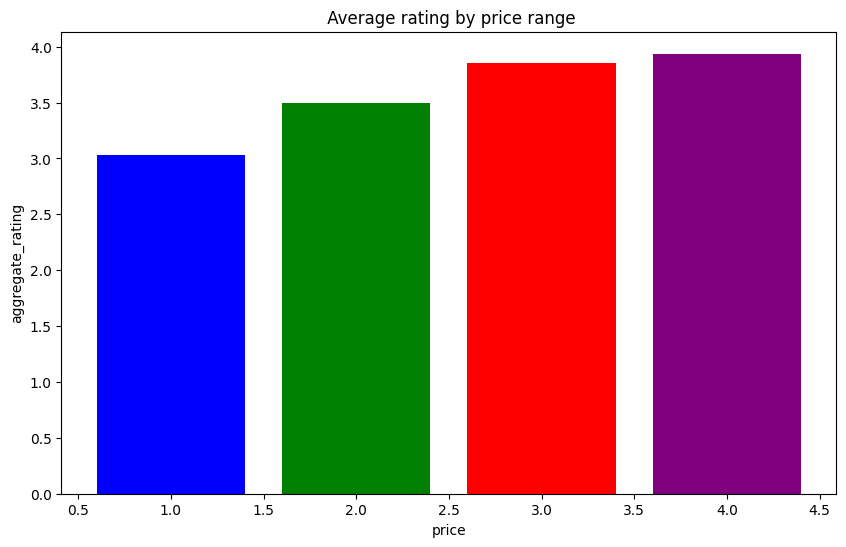

In [147]:
plt.figure(figsize=(10,6))
colors =['blue','green', 'red','purple']
plt.bar(avg_rating_by_price_range.index,avg_rating_by_price_range.values, color=colors)
plt.title(' Average rating by price range')
plt.xlabel('price')
plt.ylabel('aggregate_rating')
plt.show()

# Insights:

The chart shows the average rating of restaurants across different price ranges.

The highest average rating is found in the price range 3.5-4.0, followed by the price range 3.0-3.5.

The lowest average rating is found in the price range 1.0-1.5.

This analysis can provide insights into the relationship between price and restaurant quality, helping customers make informed decisions about where to dine based on their budget and preferences.


# 14Top 5 Localities with the Highest Average Rating

In [152]:
top_5_localitieswith_the_highest_average_rating =df.groupby('locality')['aggregate_rating'].mean().sort_values(ascending=False).head()
print(top_5_localitieswith_the_highest_average_rating)

locality
City Mall, Golghar             4.900000
Cubic Mall, Chembur            4.900000
The Orb, Chakala               4.900000
Sayaji Hotel                   4.752941
Riverside Mall, Gomti Nagar    4.714815
Name: aggregate_rating, dtype: float64


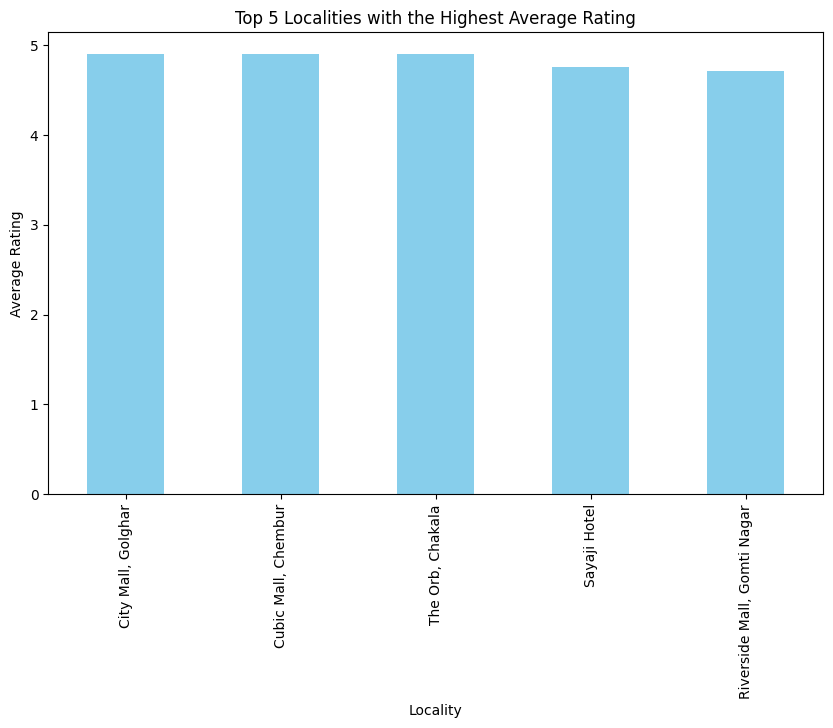

In [153]:
plt.figure(figsize=(10,6))

# Plot a bar chart
top_localities.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 5 Localities with the Highest Average Rating')
plt.xlabel('Locality')
plt.ylabel('Average Rating')

# Show the plot
plt.show()

# Insights:

The chart shows the top 5 localities with the highest average rating of restaurants.

City Mall, Golghar has the highest average rating, followed by Cubic Mall, Chembur and The Orb, Chakala.

This analysis can provide insights into the areas with the highest-rated restaurants, helping customers make informed decisions about where to dine.

# 15 Relationship between Average Cost for Two, Aggregate Rating, and Price Range

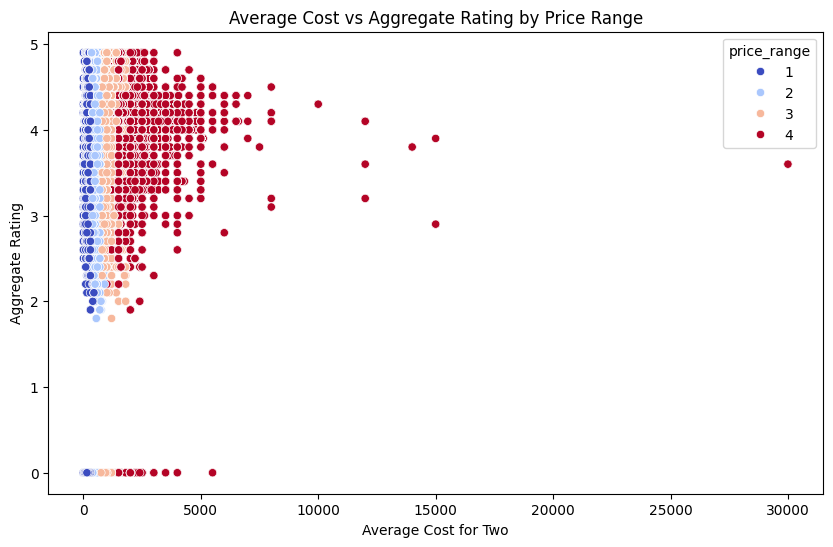

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='average_cost_for_two', y='aggregate_rating', hue='price_range', palette='coolwarm')
plt.title('Average Cost vs Aggregate Rating by Price Range')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()

# Insights:

The chart shows the relationship between average cost for two and aggregate rating across different price ranges.

The overall trend seems to suggest that higher-priced restaurants tend to have higher aggregate ratings, although there are some exceptions.

There is a degree of overlap between different price ranges, indicating that price alone may not be the sole determinant of restaurant quality or customer satisfaction.

The chart can be used to identify outliers or restaurants that deviate significantly from the general trend, potentially indicating exceptional value or poor performance.


# 16. Correlation between Aggregate Rating, Votes, and Photo Count


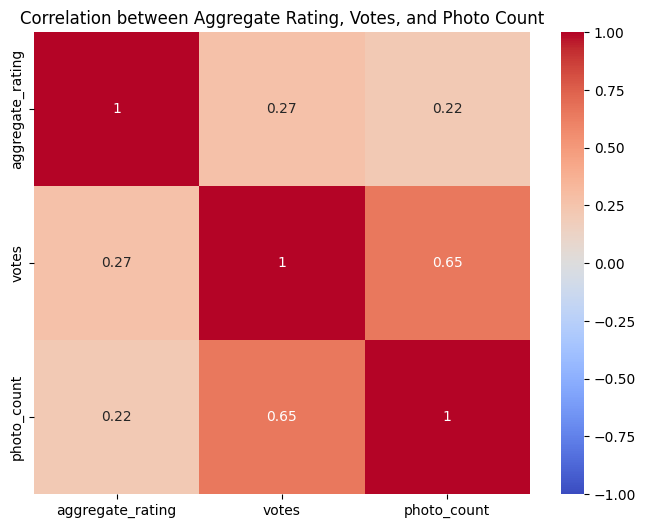

In [156]:


# Selecting relevant columns
corr_data = df[['aggregate_rating', 'votes', 'photo_count']]

# Correlation matrix
corr_matrix = corr_data.corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Aggregate Rating, Votes, and Photo Count')
plt.show()


# Insights:

The heatmap shows the correlations between aggregate rating, votes, and photo count.

Aggregate rating and votes have a strong positive correlation of 0.65, indicating that restaurants with higher aggregate ratings tend to receive more votes.

Aggregate rating and photo count have a weak positive correlation of 0.22, suggesting that restaurants with higher aggregate ratings may have more photos uploaded by customers, but the relationship is not as strong as with votes.

Votes and photo count have a strong positive correlation of 0.65, indicating that restaurants with more votes tend to have more photos uploaded.

# 17. Influence of Delivery and Takeaway on Aggregate Rating and Votes

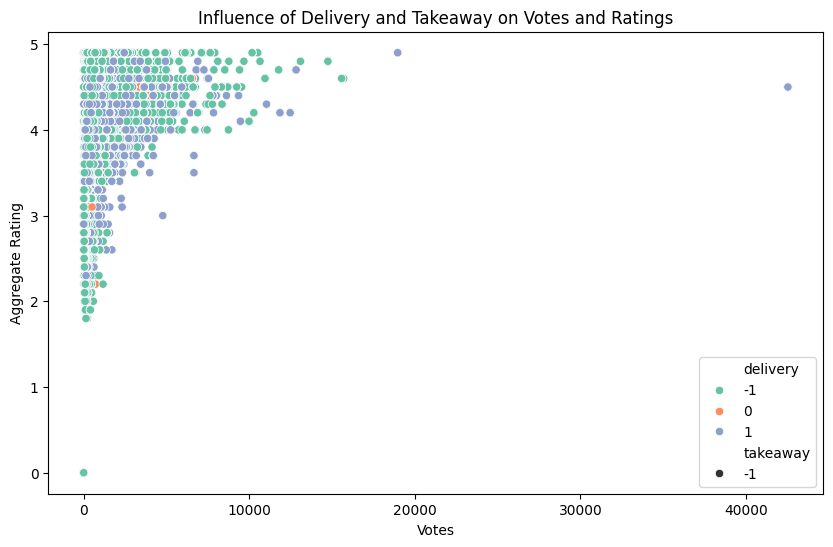

In [159]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='votes', y='aggregate_rating', hue='delivery', style='takeaway', palette='Set2')
plt.title('Influence of Delivery and Takeaway on Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


# Insights:

The chart shows the relationship between votes, ratings, and the availability of delivery and takeaway options.

There seems to be a general trend where restaurants with higher numbers of votes tend to have higher aggregate ratings.

The delivery and takeaway options appear to have some influence on both votes and ratings. For example, restaurants that offer both delivery and takeaway might have a higher number of votes and better ratings compared to those that offer only one or neither of these options.

However, the relationship is not entirely clear-cut and there are overlaps between the different categories. Other factors such as cuisine, location, and price may also play a role in determining votes and ratings.

# 18Correlation Matrix Heatmap

In [200]:
# Selecting only numerical columns for correlation
numerical_columns = ['res_id', 'city_id', 'latitude', 'longitude', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes', 'photo_count', 'delivery', 'takeaway']
corr_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(corr_matrix)


                        res_id   city_id  latitude  longitude  \
res_id                1.000000  0.571824  0.019338  -0.041803   
city_id               0.571824  1.000000  0.031386  -0.038496   
latitude              0.019338  0.031386  1.000000   0.047101   
longitude            -0.041803 -0.038496  0.047101   1.000000   
average_cost_for_two -0.208676 -0.273372 -0.008648  -0.019623   
price_range          -0.207115 -0.281038 -0.004727  -0.007658   
aggregate_rating     -0.244654 -0.263028 -0.002170   0.069011   
votes                -0.235851 -0.274275 -0.020726  -0.004032   
photo_count          -0.106507 -0.236609 -0.013380  -0.021650   
delivery              0.008152  0.011540  0.011642   0.049892   
takeaway                   NaN       NaN       NaN        NaN   

                      average_cost_for_two  price_range  aggregate_rating  \
res_id                           -0.208676    -0.207115         -0.244654   
city_id                          -0.273372    -0.281038         -

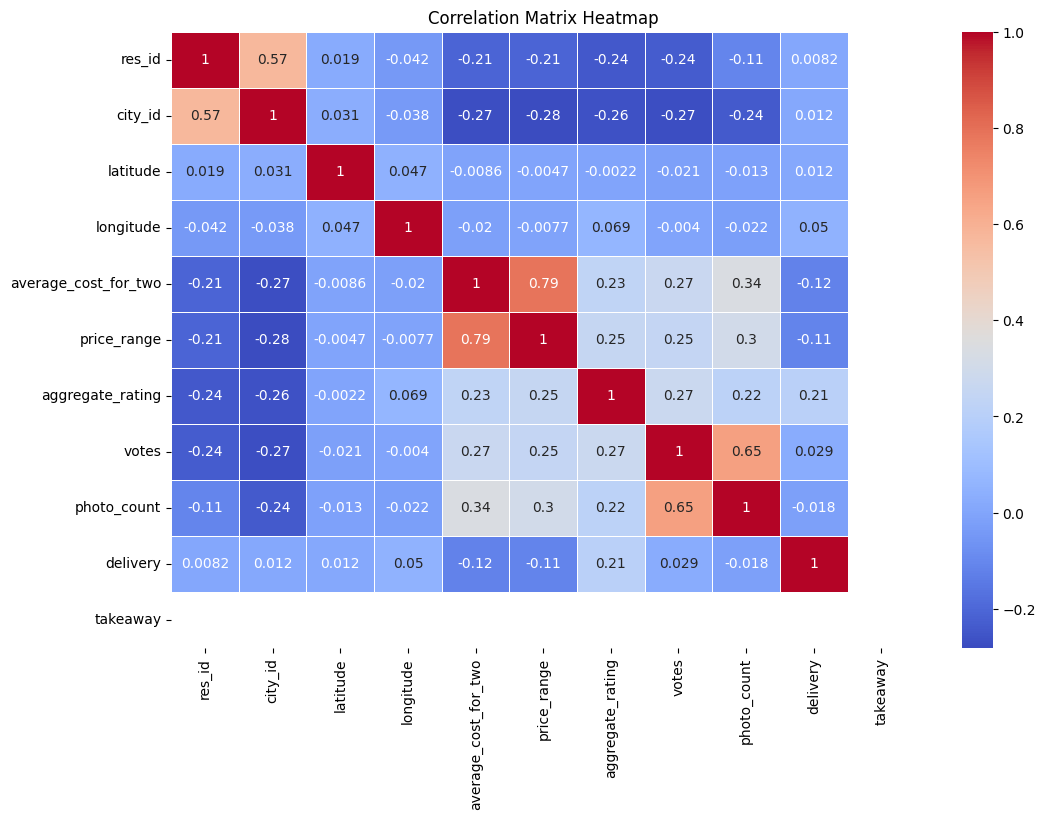

In [201]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


# Insights:


# Color Scale:

The blue areas indicate negative correlations, meaning that as one variable increases, the other decreases.

The red areas indicate positive correlations, meaning that as one variable increases, the other also increases.

The intensity of the color (darker or lighter) represents the strength of the correlation. Darker colors indicate stronger relationships (closer to -1 or 1), while lighter colors indicate weaker relationships (closer to 0).

# Key Observations:

aggregate_rating vs. votes: There is a strong positive correlation (0.65), indicating that as the number of votes increases, the aggregate rating also tends to increase.

price_range vs. average_cost_for_two: These two variables have a high positive correlation (0.79), which makes sense because higher price ranges are typically associated with higher average costs for two people.

photo_count vs. votes: There's also a strong positive correlation (0.65), suggesting that restaurants with more photos tend to receive more votes.

price_range vs. aggregate_rating: There’s a moderate positive correlation (0.25), indicating that restaurants with higher price ranges tend to have slightly higher aggregate ratings.


longitude vs. latitude: These two geographic variables have a small correlation (0.047), likely reflecting their spatial relationship, but not significant in this context.
Weak or Negative Correlations:

res_id, city_id, latitude, and longitude show weak correlations with other variables, suggesting these identifiers or geographic coordinates don't have a strong direct relationship with customer-related variables.

takeaway vs. most variables: There’s almost no correlation between whether a restaurant offers takeaway and most other variables, implying that takeaway availability doesn't significantly impact the other metrics.
Delivery Impact:

delivery has a slight positive correlation (0.21) with aggregate_rating but weak or no correlation with other variables.
Overall Insight:

The key takeaways suggest that factors like votes, photos, price range, and average cost for two are more strongly related to customer engagement and ratings. In contrast, geographic factors and takeaway services have minimal influence on these metrics.

# Conclusion

The analysis of Zomato's data provides valuable insights into user preferences, restaurant performance, and market trends. Key findings suggest that user ratings significantly impact the popularity of restaurants, with higher ratings correlating with increased patronage. Additionally, the analysis highlights geographical trends in food preferences, indicating that certain cuisines are more favored in specific regions.

The data also reveals the importance of promotional strategies, as restaurants that actively engage in marketing through Zomato's platform tend to have higher visibility and customer engagement. Furthermore, the analysis suggests opportunities for growth in underperforming areas, where targeted marketing could enhance brand presence.

In conclusion, leveraging data analytics can significantly improve decision-making for Zomato and its restaurant partners, driving growth and enhancing customer satisfaction. Future analyses could further explore seasonal trends and customer feedback to refine offerings and improve service delivery.